In this assignment about outliers, we are using the dataset after imputing missing values.  Please see [this notebook](https://github.com/yscyang1/Thinkful_Data_Science/blob/master/Exercises/Model_Preparation/1%20-%20Data%20Cleaning%202%20Missing%20Values.ipynb) on how I handled missing values.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('useducation-Cleaned.csv')

### 1) Derive the descriptive statistics of the data and discuss the points you find remarkable.

In terms of finances, the two biggest things to compare are total revenues and total expenditures.  In this case, we see that total expenditure is higher than total revenues, so it seems that the states as a whole are spending more than they have.  In addition, it seems that ~$37 is spent on each student.  

In terms of average scores, the mean scores for 8th graders are consistently higher than those of the 4th graders.  Average math scores are also higher than average reading scores.  

In [22]:
df.describe()

,YEAR,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1491.000000,1.331000e+03,1.331000e+03,1.331000e+03,1.331000e+03,1.331000e+03,1.331000e+03,1.331000e+03,1.331000e+03,1.331000e+03,1.471000e+03,1.471000e+03,1.471000e+03,1331.000000,1331.000000,1331.000000,1331.000000
mean,2004.429913,9.277468e+06,7.783102e+05,4.305385e+06,4.193772e+06,9.371828e+06,4.859099e+06,2.731291e+06,4.195471e+05,9.149042e+05,5.216306e+05,2.492681e+05,7.924324e+05,231.640394,276.582334,218.101584,262.896426
std,7.395057,1.209706e+07,1.158405e+06,5.743875e+06,5.637582e+06,1.227932e+07,6.469707e+06,3.436101e+06,5.409158e+05,1.346312e+06,6.472240e+05,3.110102e+05,9.882875e+05,11.133270,10.589205,8.032089,6.938054
min,1992.000000,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,0.000000e+00,1.270800e+04,4.878000e+03,1.808000e+03,7.254000e+03,187.134670,232.831510,178.557612,236.379102
25%,1998.000000,2.207700e+06,1.905435e+05,1.176052e+06,7.368200e+05,2.188797e+06,1.179241e+06,6.460350e+05,9.022100e+04,1.840940e+05,1.096155e+05,5.144900e+04,1.689155e+05,224.734462,270.215532,213.693918,258.048580
50%,2004.000000,5.176362e+06,4.100510e+05,2.579209e+06,2.093480e+06,5.298932e+06,2.701637e+06,1.546156e+06,2.622670e+05,5.181810e+05,3.482330e+05,1.661820e+05,5.307570e+05,232.753710,277.947260,219.735395,264.496755
75%,2011.000000,1.111990e+07,8.431690e+05,5.185174e+06,4.843230e+06,1.089196e+07,5.641158e+06,3.317215e+06,5.106995e+05,9.858440e+05,6.124295e+05,2.922360e+05,9.243010e+05,240.575489,283.986369,223.578325,268.004817
max,2017.000000,1.001865e+08,9.990221e+06,5.944866e+07,3.726902e+07,9.227431e+07,4.622260e+07,2.861419e+07,4.237587e+06,1.022366e+07,3.929869e+06,2.013687e+06,6.226523e+06,253.420961,300.568235,236.773867,280.499130


### 2) Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.

For whatever reason, I chose to study Oregon in this series of assignments, so I will continue studying Oregon.  The general trend for both revenues and expenditure is an upward trend.  Both plateau at around the same time, between 2008 to 2013.  This was the time where the economy was under recession, so resources from local and federal government was strained, resulting in no additional help (revenue) from the government, and less funds available for spending.

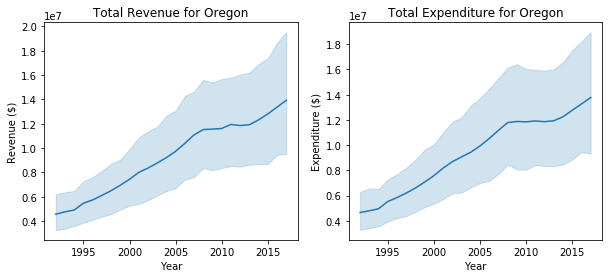

In [25]:
fig, (axis1, axis2) = plt.subplots(1,2,figsize=(10,4))

sns.lineplot(x = 'YEAR', y = 'TOTAL_REVENUE', data = df, ax = axis1)
sns.lineplot(x = 'YEAR', y = 'TOTAL_EXPENDITURE', data = df, ax = axis2)

axis1.set_title('Total Revenue for Oregon')
axis2.set_title('Total Expenditure for Oregon')

axis1.set_ylabel('Revenue ($)')
axis2.set_ylabel('Expenditure ($)')
for ax in [axis1, axis2]:
    ax.set_xlabel('Year')

### 3) In your chosen state, which of the lessons are the students more successful, math or reading?

For both 4th and 8th graders, math has a higher average score than reading.

In [29]:
df[df['STATE']=='OREGON'][['AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE','AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']].describe()

,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,26.000000,26.000000,26.000000,26.000000
mean,231.287933,280.386676,216.693744,258.280335
std,6.822200,3.222427,2.135067,8.020877
min,223.476165,276.341513,214.442087,250.753174
25%,223.476165,276.341513,214.442087,251.363201
50%,234.586059,280.892471,216.670067,251.363201
75%,237.538656,282.740726,218.142341,265.481430
max,240.099252,285.036814,220.222720,270.734453


### 4) What are the distributions of the math and reading scores in the sample?

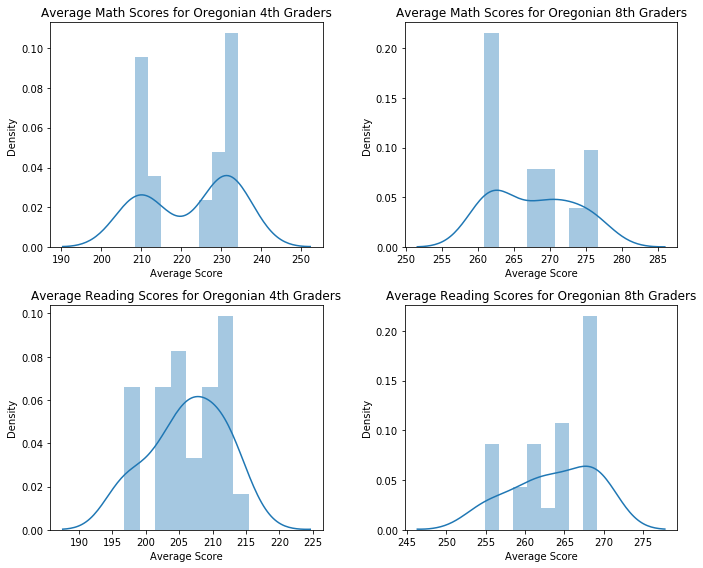

In [3]:
fig, ((axis1, axis2), (axis3, axis4)) = plt.subplots(2,2,figsize=(10,8))

sns.distplot(df[df['STATE']=='CALIFORNIA']['AVG_MATH_4_SCORE'], bins = 8, ax = axis1)
sns.distplot(df[df['STATE']=='CALIFORNIA']['AVG_MATH_8_SCORE'], bins = 8, ax = axis2)
sns.distplot(df[df['STATE']=='CALIFORNIA']['AVG_READING_4_SCORE'], bins = 8, ax = axis3)
sns.distplot(df[df['STATE']=='CALIFORNIA']['AVG_READING_8_SCORE'], bins = 8, ax = axis4)

axis1.set_title('Average Math Scores for Oregonian 4th Graders')
axis2.set_title('Average Math Scores for Oregonian 8th Graders')
axis3.set_title('Average Reading Scores for Oregonian 4th Graders')
axis4.set_title('Average Reading Scores for Oregonian 8th Graders')

for ax in [axis1, axis2, axis3, axis4]:
    ax.set_xlabel('Average Score')
    ax.set_ylabel('Density')

plt.tight_layout()